<a href="https://colab.research.google.com/github/Satyamaadi/python/blob/master/Movie_review_classification_using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb

In [2]:
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
test_labels[0]

0

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
import numpy as np

In [17]:
def vectorize_sequence(sequence,dimension=10000):
  results = np.zeros((len(sequence),dimension))
  for i , sequence in enumerate(sequence):
    results[i,sequence] = 1
  return results 


In [18]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [19]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [20]:
from keras import layers,models

In [22]:
model = models.Sequential()

In [23]:
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))

In [24]:
model.add(layers.Dense(16,activation='relu'))

In [25]:
model.add(layers.Dense(1,activation='sigmoid'))

In [26]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [28]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [29]:
history = model.fit(partial_x_train,partial_y_train,batch_size=128,epochs=20,validation_data=(x_val,y_val))

Epoch 1/20
118/118 [==============================] - 3s 9ms/step - loss: 0.5095 - accuracy: 0.7750 - val_loss: 0.3053 - val_accuracy: 0.8770
Epoch 2/20
118/118 [==============================] - 1s 7ms/step - loss: 0.2088 - accuracy: 0.9299 - val_loss: 0.2832 - val_accuracy: 0.8873
Epoch 3/20
118/118 [==============================] - 1s 7ms/step - loss: 0.1428 - accuracy: 0.9518 - val_loss: 0.3343 - val_accuracy: 0.8704
Epoch 4/20
118/118 [==============================] - 1s 6ms/step - loss: 0.1100 - accuracy: 0.9641 - val_loss: 0.3477 - val_accuracy: 0.8800
Epoch 5/20
118/118 [==============================] - 1s 7ms/step - loss: 0.0756 - accuracy: 0.9746 - val_loss: 0.3781 - val_accuracy: 0.8777
Epoch 6/20
118/118 [==============================] - 1s 7ms/step - loss: 0.0531 - accuracy: 0.9846 - val_loss: 0.4333 - val_accuracy: 0.8763
Epoch 7/20
118/118 [==============================] - 1s 7ms/step - loss: 0.0377 - accuracy: 0.9882 - val_loss: 0.5274 - val_accuracy: 0.8571
Epoch 

In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [32]:
import matplotlib.pyplot as plt 

In [34]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']

In [35]:
epochs = range(1,len(acc)+1)

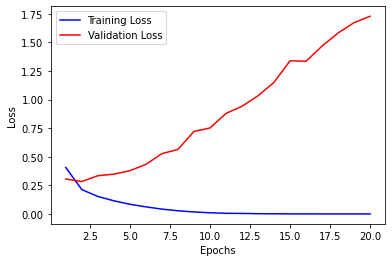

In [40]:
plt.plot(epochs,loss,'b-',label='Training Loss')
plt.plot(epochs,val_loss,'r-',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [41]:
val_acc = history.history['val_accuracy']

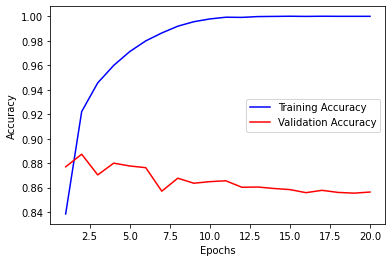

In [44]:
plt.plot(epochs,acc,'b-',label='Training Accuracy')
plt.plot(epochs,val_acc,'r-',label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()